In [12]:
from docarray import Document, DocumentArray
import matplotlib

In [128]:
MAX_DOCS = 1000
DATA_DIR = "static/images/"
DATA_PATH = f"{DATA_DIR}/**/*.jpg"
QUERY_IMAGE = f"static/images/unnamed (7) copy 5.jpg"

In [130]:
DocumentArray(storage='weaviate', config={'host': 'localhost', 'port': 8080, 'name': 'Image4'}).summary()

╭─────── Documents Summary ────────╮
│                                  │
│   Length                 0       │
│   Homogenous Documents   False   │
│   Multimodal dataclass   True    │
│                                  │
╰──────────────────────────────────╯
╭────── DocumentArrayWeaviate Config ──────╮
│                                          │
│   host                       localhost   │
│   port                       8080        │
│   protocol                   http        │
│   name                       Image4      │
│   serialize_config           {}          │
│   n_dim                      None        │
│   ef                         None        │
│   ef_construction            None        │
│   timeout_config             None        │
│   max_connections            None        │
│   dynamic_ef_min             None        │
│   dynamic_ef_max             None        │
│   dynamic_ef_factor          None        │
│   vector_cache_max_objects   None        │
│   flat_search_cutoff         None        │
│   cleanup_interval_seconds   None        │
│   skip                       None        │
│   columns                    []          │
│   distance                   None        │
│                                          │
╰──────────────────────────────────────────╯

In [132]:
docs = DocumentArray.from_files(DATA_PATH, size=MAX_DOCS, storage='weaviate', config={'host': 'localhost', 'port': 8080, 'name': 'Image4'})

In [133]:
print(f"{len(docs)} Documents in DocumentArray")

54 Documents in DocumentArray


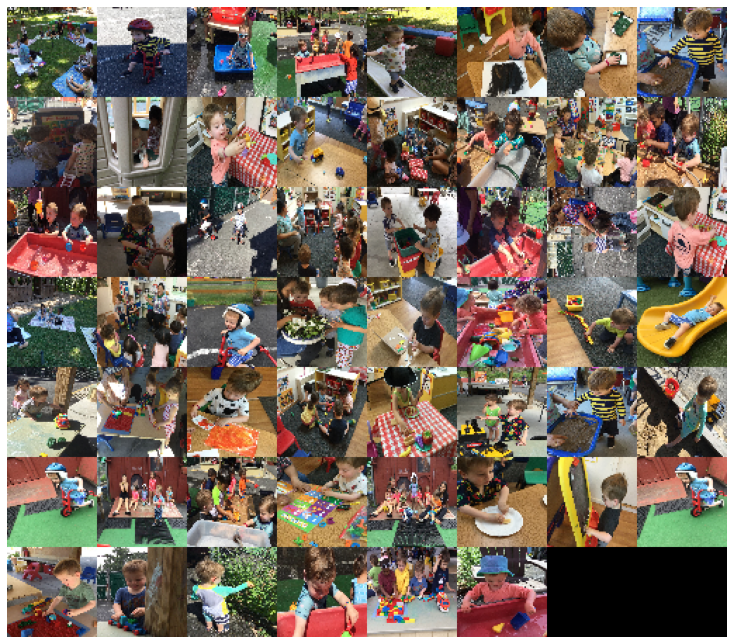

In [134]:
docs.plot_image_sprites()

In [135]:
def preproc(d: Document):
    return (d.load_uri_to_image_tensor()
            .set_image_tensor_shape((341, 256))
            .set_image_tensor_normalization()
            .set_image_tensor_channel_axis(-1,0))

In [136]:
docs.apply(preproc)

╭─────────────────────── Documents Summary ───────────────────────╮
│                                                                 │
│   Length                 54                                     │
│   Homogenous Documents   True                                   │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri')   │
│   Multimodal dataclass   False                                  │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   id          ('str',)       54               False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   54               False             │
│   uri         ('str',)       54               False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭────── DocumentArrayWeaviate Config ──────╮
│                                          │
│   host                       localhost   │
│   port                       8080        │
│   protocol                   http        │
│   name                       Image4      │
│   serialize_config           {}          │
│   n_dim                      None        │
│   ef                         None        │
│   ef_construction            None        │
│   timeout_config             None        │
│   max_connections            None        │
│   dynamic_ef_min             None        │
│   dynamic_ef_max             None        │
│   dynamic_ef_factor          None        │
│   vector_cache_max_objects   None        │
│   flat_search_cutoff         None        │
│   cleanup_interval_seconds   None        │
│   skip                       None        │
│   columns                    []          │
│   distance                   None        │
│                                          │
╰──────────────────────────────────────────╯

In [137]:
import torch
import torchvision

In [138]:
model = torchvision.models.resnet50(pretrained=True)

In [139]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [140]:
docs.embed(model, batch_size=20)

╭───────────────────────────── Documents Summary ──────────────────────────────╮
│                                                                              │
│   Length                 54                                                  │
│   Homogenous Documents   True                                                │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'embedding')   │
│   Multimodal dataclass   False                                               │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('Tensor',)    54               False             │
│   id          ('str',)       54               False             │
│   mime_type   ('str',)       1                False             │
│   tensor      ('ndarray',)   54               False             │
│   uri         ('str',)       54               False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯
╭────── DocumentArrayWeaviate Config ──────╮
│                                          │
│   host                       localhost   │
│   port                       8080        │
│   protocol                   http        │
│   name                       Image4      │
│   serialize_config           {}          │
│   n_dim                      None        │
│   ef                         None        │
│   ef_construction            None        │
│   timeout_config             None        │
│   max_connections            None        │
│   dynamic_ef_min             None        │
│   dynamic_ef_max             None        │
│   dynamic_ef_factor          None        │
│   vector_cache_max_objects   None        │
│   flat_search_cutoff         None        │
│   cleanup_interval_seconds   None        │
│   skip                       None        │
│   columns                    []          │
│   distance                   None        │
│                                          │
╰──────────────────────────────────────────╯

In [141]:
docs[:, 'tensor'] = None

In [142]:
query_doc = Document(uri=QUERY_IMAGE)

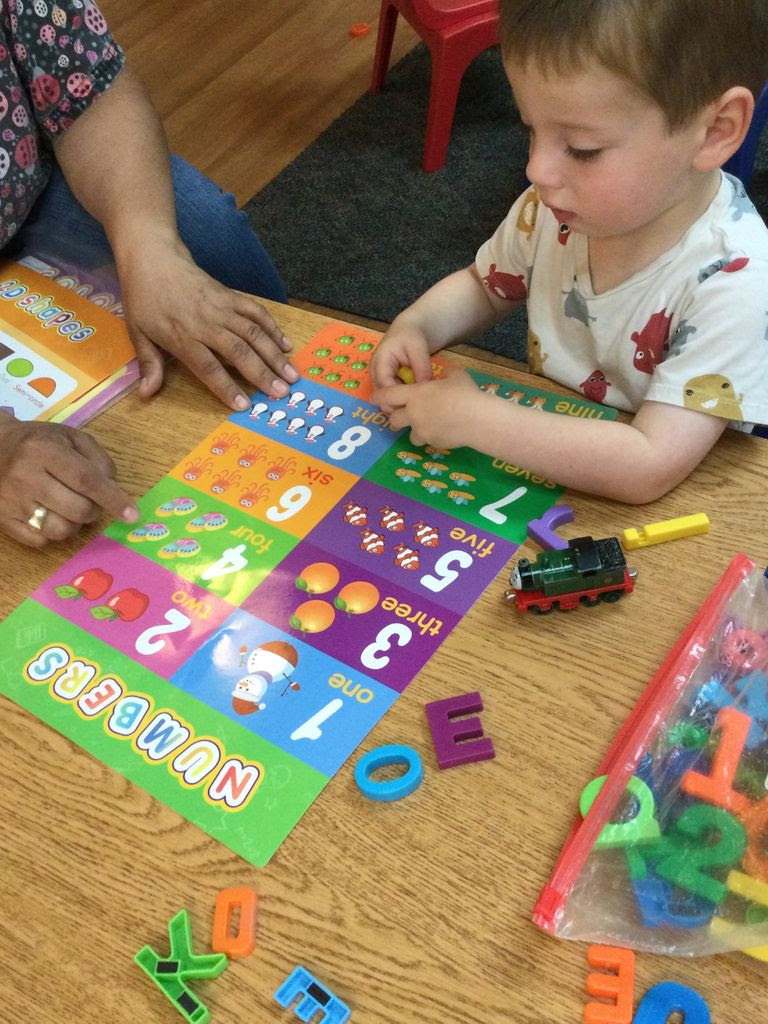

In [143]:
query_doc.display()

In [144]:
query_doc = preproc(query_doc)

In [145]:
query_doc.embed(model)

📄 Document: 72eaaf23837ccb539601a5554d8bfc6e
╭────────────┬─────────────────────────────────────────────────────────────────╮
│ Attribute  │ Value                                                           │
├────────────┼─────────────────────────────────────────────────────────────────┤
│ tensor     │ <class 'numpy.ndarray'> in shape (3, 341, 256), dtype: float32  │
│ mime_type  │ image/jpeg                                                      │
│ uri        │ static/images/unnamed (7) copy 5.jpg                            │
│ embedding  │ <class 'torch.Tensor'> in shape (1000,), dtype: float32         │
╰────────────┴─────────────────────────────────────────────────────────────────╯

In [146]:
top5 = docs.find(query_doc, limit=5)

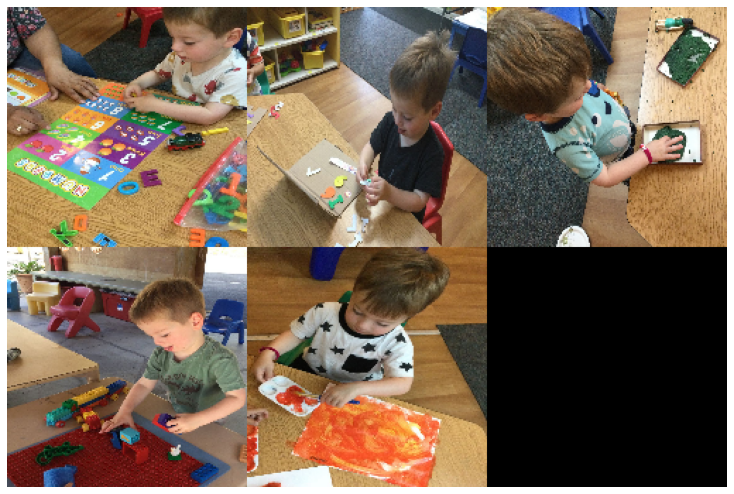

In [147]:
top5[0].plot_image_sprites()

In [150]:
[doc.uri for doc in top5[0]]

['static/images/unnamed (7) copy 5.jpg',
 'static/images/unnamed (8) copy 4.jpg',
 'static/images/kaymbu-image-20220701-2126.jpg',
 'static/images/unnamed (7) copy 7.jpg',
 'static/images/unnamed (7).jpg']

In [152]:
DocumentArray(storage='weaviate', config={'host': 'localhost', 'port': 8080, 'name': 'Image4'})

╭─────── Documents Summary ────────╮
│                                  │
│   Length                 54      │
│   Homogenous Documents   False   │
│   Multimodal dataclass   True    │
│                                  │
╰──────────────────────────────────╯
╭────── DocumentArrayWeaviate Config ──────╮
│                                          │
│   host                       localhost   │
│   port                       8080        │
│   protocol                   http        │
│   name                       Image4      │
│   serialize_config           {}          │
│   n_dim                      None        │
│   ef                         None        │
│   ef_construction            None        │
│   timeout_config             None        │
│   max_connections            None        │
│   dynamic_ef_min             None        │
│   dynamic_ef_max             None        │
│   dynamic_ef_factor          None        │
│   vector_cache_max_objects   None        │
│   flat_search_cutoff         None        │
│   cleanup_interval_seconds   None        │
│   skip                       None        │
│   columns                    []          │
│   distance                   None        │
│                                          │
╰──────────────────────────────────────────╯